In [83]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# import data

df = pd.read_excel("Junior Data Analyst _ Data.xlsx", header = 2)
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [85]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [87]:
# Checking data for outliers and duplicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Hour', ylabel='Solar electricity generation (kWh)'>

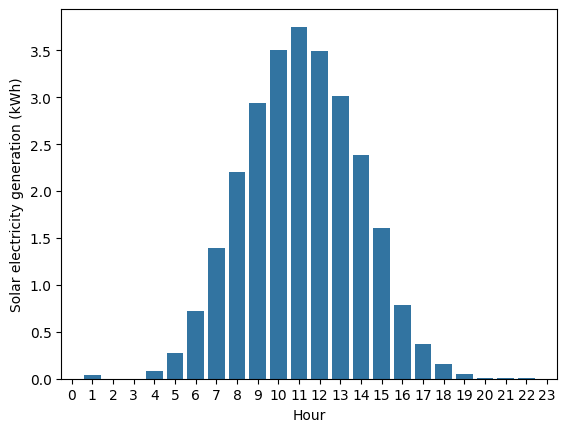

In [88]:
# Plotting the average solar electricity generated per hour
import seaborn as sns
hourly_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
sns.barplot(hourly_solar)

It seems unlikely to have sunlight at 1 AM in the morning. Let us investigate this further.

In [89]:
df[(df['Hour']==1) & (df['Solar electricity generation (kWh)']>0)]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2569,1,2020-04-18 01:00:00,13.05,0.315968


13kWh at 1AM seems highly unlikely, and we will therefore be dropping this instance.

In [90]:
df.drop(index = 2569, inplace = True)

Next, we would like to see any trends in the hourly electricity used.

<Axes: xlabel='Hour', ylabel='Electricity usage (kWh)'>

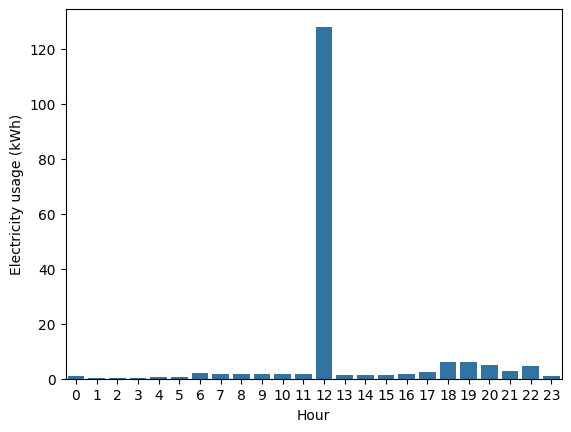

In [91]:
hourly_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()
sns.barplot(hourly_electricity)

We seem to have an extreme outlier here.

In [92]:
df[df['Hour']==12]['Electricity usage (kWh)'].describe()

count      365.000000
mean       128.000444
std       2407.650952
min          0.000000
25%          0.246000
50%          0.483000
75%          0.921000
max      46000.000000
Name: Electricity usage (kWh), dtype: float64

Wow! The average consumption is 128 kWh and the median is 0.483 and the max is 46000.
This is definitely an outlier.

In [93]:
df[df['Electricity usage (kWh)']==46000].index

Index([276], dtype='int64')

In [94]:
df.drop(index = 276, inplace = True)

<Axes: xlabel='Hour', ylabel='Electricity usage (kWh)'>

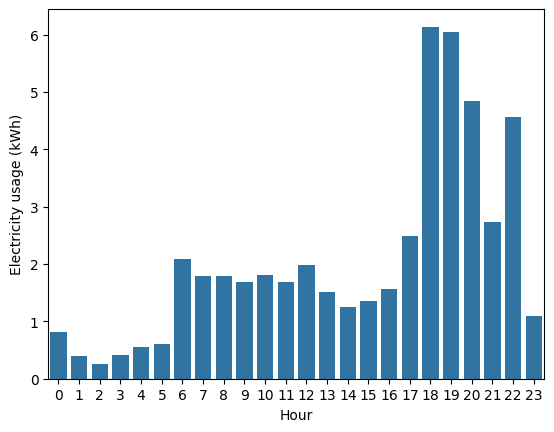

In [95]:
hourly_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()
sns.barplot(hourly_electricity)

<Axes: xlabel='Hour', ylabel='Solar electricity generation (kWh)'>

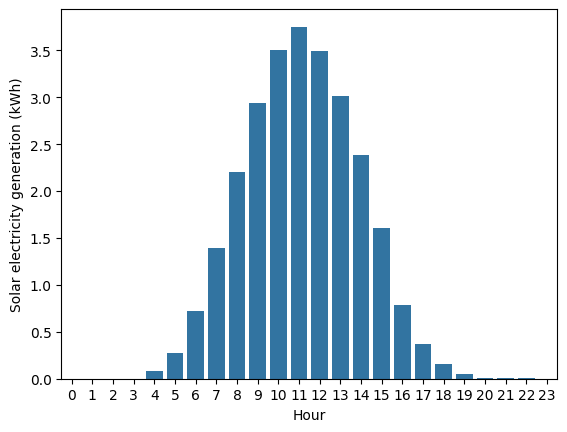

In [96]:
hourly_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
sns.barplot(hourly_solar)

The min value for electricity consumption is a negative value which does not make sense. 

In [97]:
df[df['Electricity usage (kWh)']<0]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
17,17,2020-01-01 17:00:00,0.006,-12.6240
933,21,2020-02-08 21:00:00,0.006,-2.1330
935,23,2020-02-08 23:00:00,0.000,-0.2175
3593,17,2020-05-30 17:00:00,1.185,-2.5140
6464,8,2020-09-27 08:00:00,0.717,-1.9770


Fortunately it is only in a few rows, and we will be able to drop them.

In [98]:
df = df[df['Electricity usage (kWh)']>0]


Checking for outliers in our Solar distribution

<Axes: ylabel='Solar electricity generation (kWh)'>

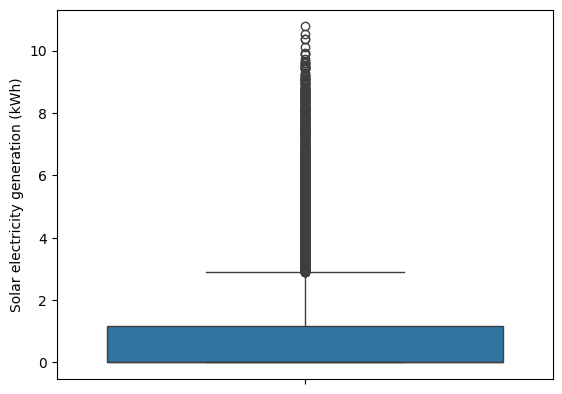

In [99]:
sns.boxplot(y = 'Solar electricity generation (kWh)', data = df)

<Axes: ylabel='Solar electricity generation (kWh)'>

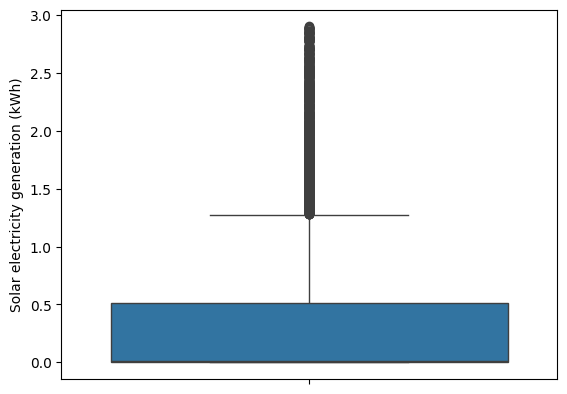

In [100]:
# Defining the IQR
bottom_25_sol= df['Solar electricity generation (kWh)'].quantile(0.25)
top_25_sol = df['Solar electricity generation (kWh)'].quantile(0.75)
IQR = top_25_sol - bottom_25_sol

# Creating a mask to filter the middle part of our data
sol_mask = df['Solar electricity generation (kWh)'].between(bottom_25_sol - 1.5 * IQR, top_25_sol + 1.5 * IQR)

# Dropping outliers using the mask
df = df[sol_mask]

# Visualizing the trimmed data
sns.boxplot(y = 'Solar electricity generation (kWh)', data = df)

Checking for outliers in our Electricity distribution

<Axes: ylabel='Electricity usage (kWh)'>

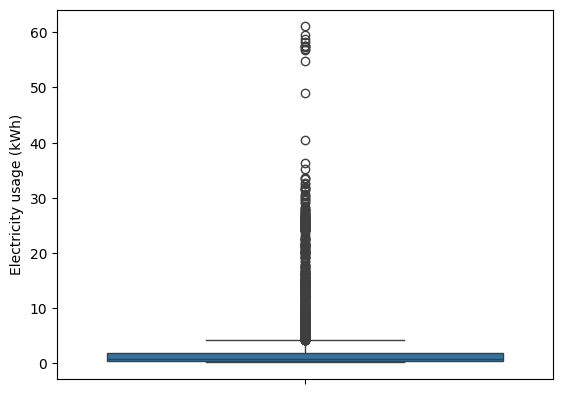

In [101]:
sns.boxplot(y = 'Electricity usage (kWh)', data = df)

<Axes: ylabel='Electricity usage (kWh)'>

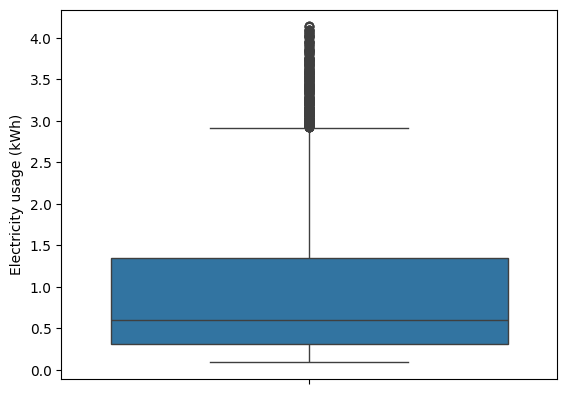

In [102]:
# Defining the IQR
bottom_25_elec = df['Electricity usage (kWh)'].quantile(0.25)
top_25_elec = df['Electricity usage (kWh)'].quantile(0.75)
IQR = top_25_elec - bottom_25_elec

# Creating a mask to filter the middle data
elec_mask = df['Electricity usage (kWh)'].between(bottom_25_elec - 1.5 * IQR, top_25_elec + 1.5 *IQR)
df = df[elec_mask]

# Visualizing the trimmed data
sns.boxplot(y = 'Electricity usage (kWh)', data = df)

A vast improvement.

Next we would like to seethe trends of consumption and generation across the 12 months. We create a new column month to visualize these trends.

<Figure size 1000x800 with 0 Axes>

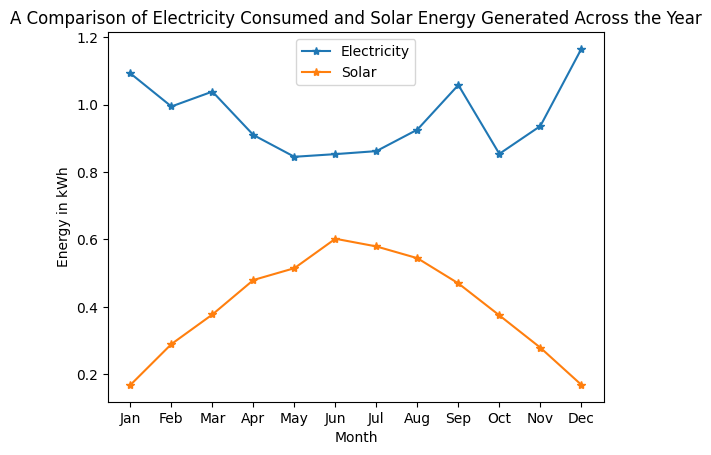

In [103]:
# Extracting a month column
df['Date/hour start']= pd.to_datetime(df['Date/hour start'])
df['Month']= pd.DatetimeIndex(df['Date/hour start']).month
monthly_usage= df.groupby('Month')[['Electricity usage (kWh)', 'Solar electricity generation (kWh)']].mean()

# Plotting the trends across the year
plt.figure(figsize=(10, 8))
monthly_usage.plot(marker = '*')
plt.ylabel('Energy in kWh')
plt.title('A Comparison of Electricity Consumed and Solar Energy Generated Across the Year')
plt.legend(loc = 'upper center', labels = ['Electricity', 'Solar'])
plt.xticks(ticks = monthly_usage.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


There seems to be a relationship between when there is more sunshine and lower electricity consumption. Perhaps the house uses electricity for warmth in the colder months or energy saving measures like drying clothes on a clothes line as opposed to a drying machine.

Checking patterns across the Seven days of the week.

In [104]:
# Extracting day of the week
df['Day']= pd.to_datetime(df['Date/hour start']).dt.day_name()

# Grouping the mean electricity consumed and solar generated by day of the week
daily_usage= (df.groupby('Day')
            [['Electricity usage (kWh)', 'Solar electricity generation (kWh)']]
            .mean())
daily_usage


,Electricity usage (kWh),Solar electricity generation (kWh)
Day,,
Friday,0.968013,0.415602
Monday,0.960391,0.372331
Saturday,0.917469,0.419366
Sunday,0.937761,0.393563
Thursday,0.935808,0.367380
Tuesday,1.023369,0.389714
Wednesday,1.024864,0.397409


Having checked the trends across the year and across the days of the week, we can go ahead and try to model our battery after dropping unnecessary columns month and day.

In [105]:
# Dropping Day and Month columns
df.drop(columns =['Day', 'Month'], inplace = True)
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


We are looking to model a solar panel battery such that the battery stores excess solar power generated and this reserved energy is drawn upon when the solar energy being generated goes down. This would mean that if the investment is made to buy a solar panel battery, the electricity consumed in the household would be:

First from solar energy, then if this is insufficient or absent,
energy would be drawn from the reserves in the battery
& lastly bought from the electricity supplier.

First we need to find out how much electricity is being bought with the solar panels installed already.

In [106]:
df['Electricity_bought'] = np.maximum(0, (df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']))

df.head(13)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_bought
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000


From this, we can calculate how much electricity is being bought yearly.

In [107]:
total_electricity_bought = df['Electricity_bought'].sum()

print(f"total electricity bought: {total_electricity_bought} kWh")

total electricity bought: 5233.72752 kWh


Then we can calculate how much excess solar energy is being generated.

In [108]:
df['Excess_solar'] = np.maximum(0, df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)'])

df[3230:3240]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_bought,Excess_solar
4326,6,2020-06-30 06:00:00,1.977,1.5870,0.0000,0.390
4331,11,2020-06-30 11:00:00,2.121,0.1680,0.0000,1.953
4333,13,2020-06-30 13:00:00,2.295,0.2460,0.0000,2.049
4334,14,2020-06-30 14:00:00,2.862,0.1230,0.0000,2.739
4335,15,2020-06-30 15:00:00,1.656,0.4410,0.0000,1.215
4336,16,2020-06-30 16:00:00,1.971,0.5280,0.0000,1.443
4338,18,2020-06-30 18:00:00,0.210,1.2606,1.0506,0.000
4339,19,2020-06-30 19:00:00,0.054,1.9272,1.8732,0.000
4340,20,2020-06-30 20:00:00,0.000,2.8248,2.8248,0.000
4341,21,2020-06-30 21:00:00,0.006,1.2210,1.2150,0.000


In [109]:
total_excess_solar = df['Excess_solar'].sum()
print(f"total excess solar generated: {total_excess_solar}")

total excess solar generated: 1405.101


Wow! That is a lot of energy going to waste. The next question we would want to know the answer to is, over the lifespan of a solar panel battery, would the cost of the battery be mitigated by the savings made from money not being spent purchasing energy? We answer this by modelling a battery that saves excess solar energy generated every hour and compute if the money saved from electricity not bought justifies acquiring a battery over its lifespan.

Notice how in the last time we sliced through the data above, the slices did not match the indices displayed. Also, some hours are missing as they were excluded when we got rid of outliers. To remedy this and for easier modelling, we are going to reset the index.

In [110]:
df.reset_index(drop = True, inplace = True)

In [111]:
# To model our battery, we iterated through the dataframe applying row-wise calculations and populated a list.
battery_bar = []

battery_charge = 0

# Instance where the solar electricity generated exceeds the electricity consumption in that hour

for i in range(len(df)):
  if ((df['Solar electricity generation (kWh)'].iloc[i] - df['Electricity usage (kWh)'].iloc[i])>=0):
     
    # When updating the charge does not surpass the full charge

     if ((df['Solar electricity generation (kWh)'].iloc[i] - df['Electricity usage (kWh)'].iloc[i]) + battery_charge) <= 12.5:
      battery_charge += (df['Solar electricity generation (kWh)'].iloc[i] - df['Electricity usage (kWh)'].iloc[i])
      battery_bar.append(battery_charge)

    # When updating the charge would surpass the maximum charge available on our battery
     elif(((df['Solar electricity generation (kWh)'].iloc[i] - df['Electricity usage (kWh)'].iloc[i]) + battery_charge) > 12.5):
      battery_charge = 12.5
      battery_bar.append(battery_charge)

# Instance where the charge in our battery from hours prior exceeds the electricity consumed in the hour
  elif battery_charge < (df['Electricity usage (kWh)'].iloc[i] - df['Solar electricity generation (kWh)'].iloc[i]):
    battery_charge = 0
    battery_bar.append(battery_charge)

# Instance where electricity consumed in the hour exceeds solar generated electricity
  elif df['Electricity usage (kWh)'].iloc[i] - df['Solar electricity generation (kWh)'].iloc[i] > 0:
    battery_charge > (df['Electricity usage (kWh)'].iloc[i] - df['Solar electricity generation (kWh)'].iloc[i])
    battery_charge -= (df['Electricity usage (kWh)'].iloc[i] - df['Solar electricity generation (kWh)'].iloc[i])
    battery_bar.append(battery_charge)

In [112]:
df['Battery'] = battery_bar

#Illustrating using the previous slice
df[3230:3240]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_bought,Excess_solar,Battery
3230,6,2020-06-30 06:00:00,1.977,1.5870,0.0000,0.390,0.8490
3231,11,2020-06-30 11:00:00,2.121,0.1680,0.0000,1.953,2.8020
3232,13,2020-06-30 13:00:00,2.295,0.2460,0.0000,2.049,4.8510
3233,14,2020-06-30 14:00:00,2.862,0.1230,0.0000,2.739,7.5900
3234,15,2020-06-30 15:00:00,1.656,0.4410,0.0000,1.215,8.8050
3235,16,2020-06-30 16:00:00,1.971,0.5280,0.0000,1.443,10.2480
3236,18,2020-06-30 18:00:00,0.210,1.2606,1.0506,0.000,9.1974
3237,19,2020-06-30 19:00:00,0.054,1.9272,1.8732,0.000,7.3242
3238,20,2020-06-30 20:00:00,0.000,2.8248,2.8248,0.000,4.4994
3239,21,2020-06-30 21:00:00,0.006,1.2210,1.2150,0.000,3.2844


In [113]:
# Checking that our battery does not go beyond the capacity of 12.5
print(df['Battery'].max())

# df[df['Battery']==12.5].index

# Illustrating instance where battery reaches maximum capacity but there is still excess solar
df[2745:2754]

12.5


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_bought,Excess_solar,Battery
2745,6,2020-05-31 06:00:00,2.208,0.252,0.000,1.956,5.212165
2746,7,2020-05-31 07:00:00,2.505,0.387,0.000,2.118,7.330165
2747,11,2020-05-31 11:00:00,2.844,0.507,0.000,2.337,9.667165
2748,12,2020-05-31 12:00:00,2.160,0.516,0.000,1.644,11.311165
2749,13,2020-05-31 13:00:00,2.379,0.123,0.000,2.256,12.500000
2750,15,2020-05-31 15:00:00,2.670,0.405,0.000,2.265,12.500000
2751,16,2020-05-31 16:00:00,1.872,0.438,0.000,1.434,12.500000
2752,17,2020-05-31 17:00:00,0.597,0.372,0.000,0.225,12.500000
2753,18,2020-05-31 18:00:00,0.273,0.528,0.255,0.000,12.245000


Our column Electricity_bought can now be considered redundant as we are now interested in the electricity bought with a battery installed. 

In [114]:
# Calculating the electricity bought with a battery installed
df['Electricity_bought_with_battery'] = np.maximum(0,(df['Electricity usage (kWh)'] -
                                                    (df['Solar electricity generation (kWh)'] + df['Battery'].shift(1))))

# Rename column for easier identification
df.rename(columns = {'Electricity_bought': 'Electricity_bought_without_battery'}, inplace = True)

df[3230:3240]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_bought_without_battery,Excess_solar,Battery,Electricity_bought_with_battery
3230,6,2020-06-30 06:00:00,1.977,1.5870,0.0000,0.390,0.8490,0.0
3231,11,2020-06-30 11:00:00,2.121,0.1680,0.0000,1.953,2.8020,0.0
3232,13,2020-06-30 13:00:00,2.295,0.2460,0.0000,2.049,4.8510,0.0
3233,14,2020-06-30 14:00:00,2.862,0.1230,0.0000,2.739,7.5900,0.0
3234,15,2020-06-30 15:00:00,1.656,0.4410,0.0000,1.215,8.8050,0.0
3235,16,2020-06-30 16:00:00,1.971,0.5280,0.0000,1.443,10.2480,0.0
3236,18,2020-06-30 18:00:00,0.210,1.2606,1.0506,0.000,9.1974,0.0
3237,19,2020-06-30 19:00:00,0.054,1.9272,1.8732,0.000,7.3242,0.0
3238,20,2020-06-30 20:00:00,0.000,2.8248,2.8248,0.000,4.4994,0.0
3239,21,2020-06-30 21:00:00,0.006,1.2210,1.2150,0.000,3.2844,0.0


In [115]:
# Calculating costs saved if we assume cost per unit is $0.17
costs_saved = (df['Electricity_bought_without_battery'].sum() - df['Electricity_bought_with_battery'].sum()) * 0.17

print(f"Approx costs saved in one year: ${costs_saved}")

Approx costs saved in one year: $237.1732733060001


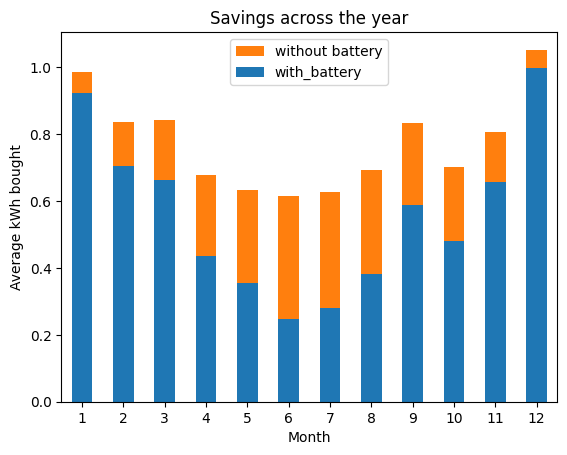

In [116]:
# Reobtaining month column for visualisation
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])
df['month'] = pd.DatetimeIndex(df['Date/hour start']).month

df.groupby('month')['Electricity_bought_without_battery'].mean().plot(kind = 'bar', color = 'C1', label = 'without battery')
df.groupby('month')['Electricity_bought_with_battery'].mean().plot(kind = 'bar', color = 'C0', label = 'with_battery')

plt.title('Savings across the year')
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Average kWh bought')

plt.legend()

With this analysis, one can estimate whether the annual savings over the lifespan of the battery are worth the cost, as well as the best time of year to purchase one for the best value for money.